<a href="https://colab.research.google.com/github/shorub/Projects/blob/main/Energy_Consumption_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
data = pd.read_csv('Energy_consumption_dataset.csv')
data.head(), data.info(), data.describe()
#Displaying the first few rows and getting a brief summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              5000 non-null   int64  
 1   Hour               5000 non-null   int64  
 2   DayOfWeek          5000 non-null   object 
 3   Holiday            5000 non-null   object 
 4   Temperature        5000 non-null   float64
 5   Humidity           5000 non-null   float64
 6   SquareFootage      5000 non-null   float64
 7   Occupancy          5000 non-null   int64  
 8   HVACUsage          5000 non-null   object 
 9   LightingUsage      5000 non-null   object 
 10  RenewableEnergy    5000 non-null   float64
 11  EnergyConsumption  5000 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 468.9+ KB


(   Month  Hour DayOfWeek Holiday  Temperature   Humidity  SquareFootage  \
 0      1     0  Saturday      No    25.139433  43.431581    1565.693999   
 1      1     1  Saturday      No    27.731651  54.225919    1411.064918   
 2      1     2  Saturday      No    28.704277  58.907658    1755.715009   
 3      1     3  Saturday      No    20.080469  50.371637    1452.316318   
 4      1     4  Saturday      No    23.097359  51.401421    1094.130359   
 
    Occupancy HVACUsage LightingUsage  RenewableEnergy  EnergyConsumption  
 0          5        On           Off         2.774699          75.364373  
 1          1        On            On        21.831384          83.401855  
 2          2       Off           Off         6.764672          78.270888  
 3          1       Off            On         8.623447          56.519850  
 4          9        On           Off         3.071969          70.811732  ,
 None,
              Month         Hour  Temperature     Humidity  SquareFootage  \
 

In [39]:
#Checking if there are any missing values
data.isnull().sum()

,0
Month,0
Hour,0
DayOfWeek,0
Holiday,0
Temperature,0
Humidity,0
SquareFootage,0
Occupancy,0
HVACUsage,0
LightingUsage,0


There are no missing values in the dataset

In [40]:
from scipy.stats import skew
from scipy.stats import kurtosis
print('Skewness:', skew(data['EnergyConsumption']))
print('Kurtosis:', kurtosis(data['EnergyConsumption']))

Skewness: 0.0003178789032434677
Kurtosis: -0.30727664487187356


The distribution appears to be quite close to a normal distribution with a slight positive Skew and a slight negative Kurtosis. This indicates that the dataset is unlikely to have extreme outliers.

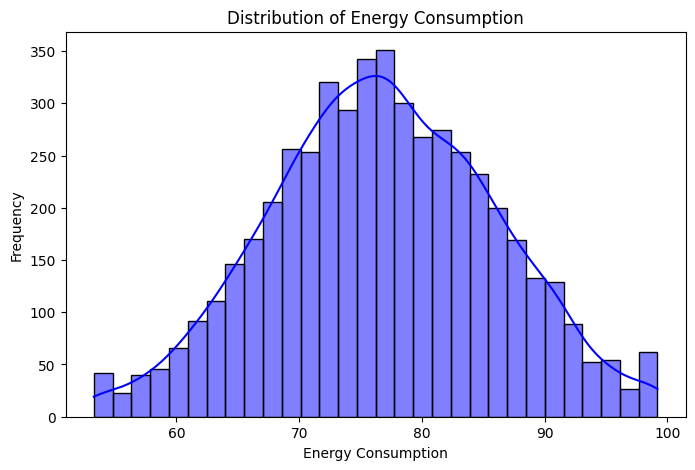

In [41]:
#Distribution of energy consumption
plt.figure(figsize=(8, 5))
sns.histplot(data["EnergyConsumption"], kde=True, bins=30, color='blue')
plt.title("Distribution of Energy Consumption")
plt.xlabel("Energy Consumption")
plt.ylabel("Frequency")
plt.show()


*   Average Cunsumption is 76.79, ranging from 53.3 and 99.2


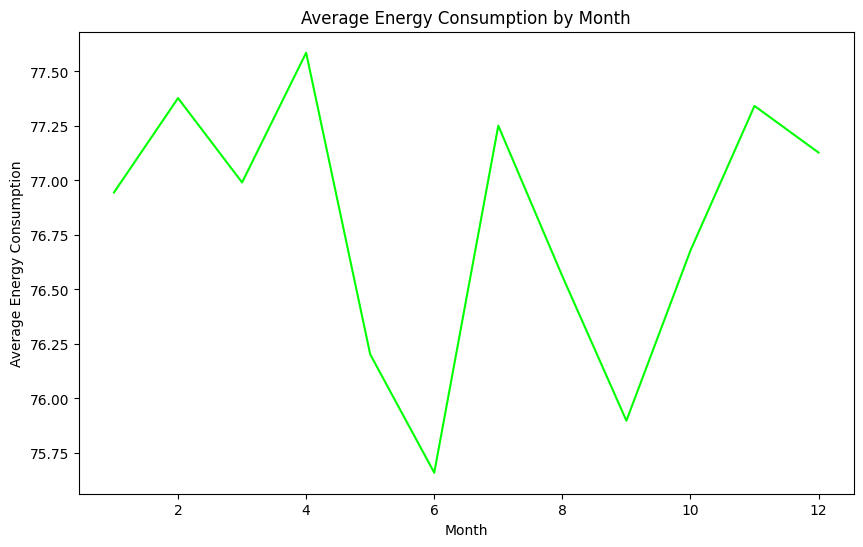

In [42]:
#Average Energy Consumption by month
average_consumption_by_month = data.groupby('Month')['EnergyConsumption'].mean()
plt.figure(figsize=(10, 6))
average_consumption_by_month.plot(kind='line', color='lime')
plt.title("Average Energy Consumption by Month")
plt.xlabel("Month")
plt.ylabel("Average Energy Consumption")
plt.show()


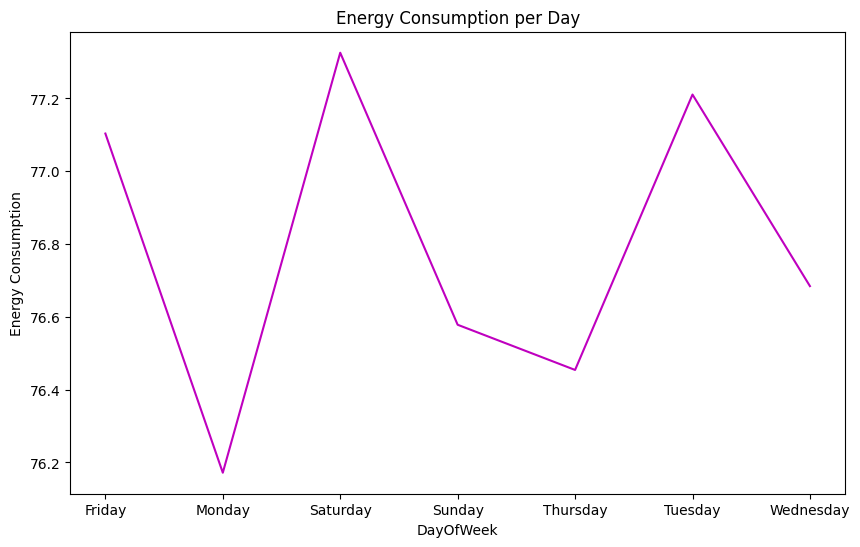

In [43]:
#Average Energy consumption per day
energy_consumption_per_day = data.groupby('DayOfWeek')['EnergyConsumption'].mean()
plt.figure(figsize=(10, 6))
energy_consumption_per_day.plot(kind='line', color='m')
plt.title("Energy Consumption per Day")
plt.xlabel("DayOfWeek")
plt.ylabel("Energy Consumption")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

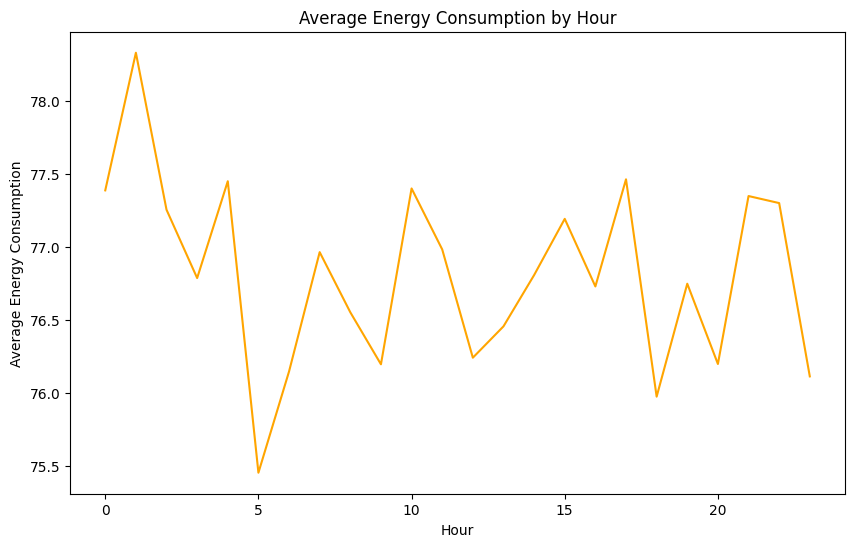

In [44]:
#average consumption by the hour
average_consumption_by_hour = data.groupby('Hour')['EnergyConsumption'].mean()
plt.figure(figsize=(10, 6))
average_consumption_by_hour.plot(kind='line', color='orange')
plt.title("Average Energy Consumption by Hour")
plt.xlabel("Hour")
plt.ylabel("Average Energy Consumption")
plt.show

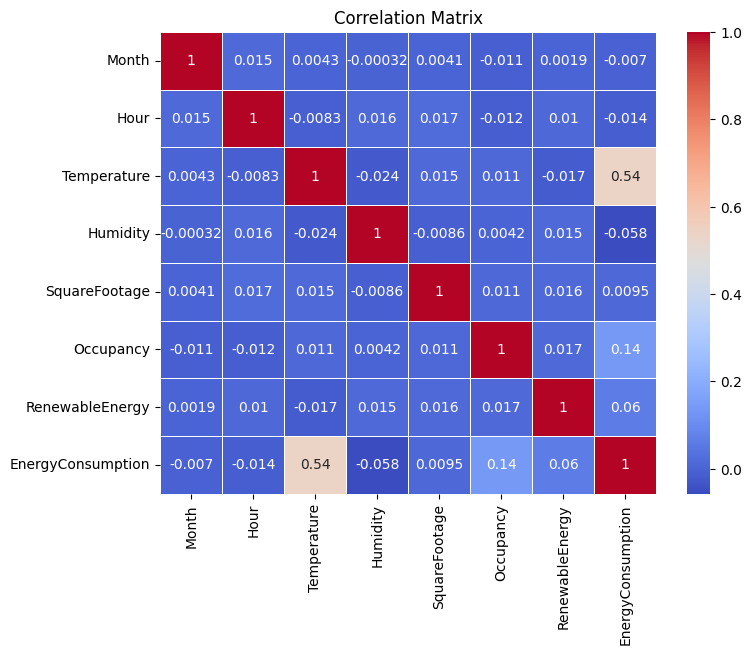

In [45]:
#Calculating the correlation between the values
#This is calcualted by on selecting the values that are integers or float data type.
numerical_columns = data.select_dtypes(include=["float64", "int64"]).columns
correlation_matrix = data[numerical_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

Slight positive correlation between Temperature and Energy Consumption.
Not significant correlation between different the other factors.

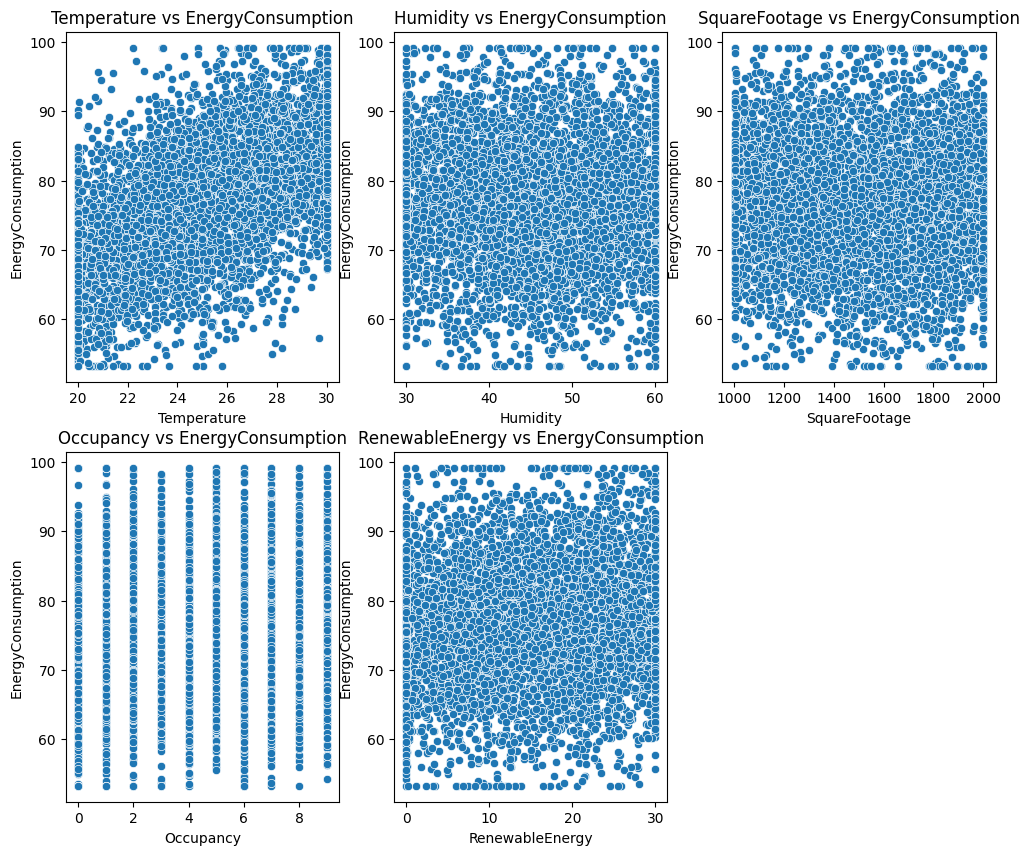

In [46]:
# Pairwise scatter plots for key features vs EnergyConsumption
key_features = ['Temperature', 'Humidity', 'SquareFootage', 'Occupancy', 'RenewableEnergy']
plt.figure(figsize=(12, 10))
for i, feature in enumerate(key_features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=feature, y='EnergyConsumption', data=data)
    plt.title(f'{feature} vs EnergyConsumption')

In [47]:
from sklearn.preprocessing import StandardScaler

features = ['EnergyConsumption']
x = data.loc[:, key_features].values
X = StandardScaler().fit_transform(x)
print(X)


[[ 0.0633301  -0.22811101  0.19886469  0.14591031 -1.35717895]
 [ 0.91564804  0.97503057 -0.32866736 -1.23060206  0.72412639]
 [ 1.23544644  1.49685927  0.84713971 -0.88647397 -0.92140789]
 ...
 [ 0.42067502 -1.72342036  1.680481    0.14591031  1.41555541]
 [-0.08996499  0.52896811 -0.90950402 -0.88647397  0.62442243]
 [ 0.28146783 -0.41009834  0.97658823  0.4900384  -0.75000264]]


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [49]:
#Predicitve modelling
y = data['EnergyConsumption']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")



R-squared: 0.2713595000007397


In [50]:
new_model = RandomForestRegressor()
new_model.fit(X_train, y_train)
new_y_pred = new_model.predict(X_test)
new_r2 = r2_score(y_test, new_y_pred)
print(f"R-squared: {new_r2}")

R-squared: 0.22628285677829363


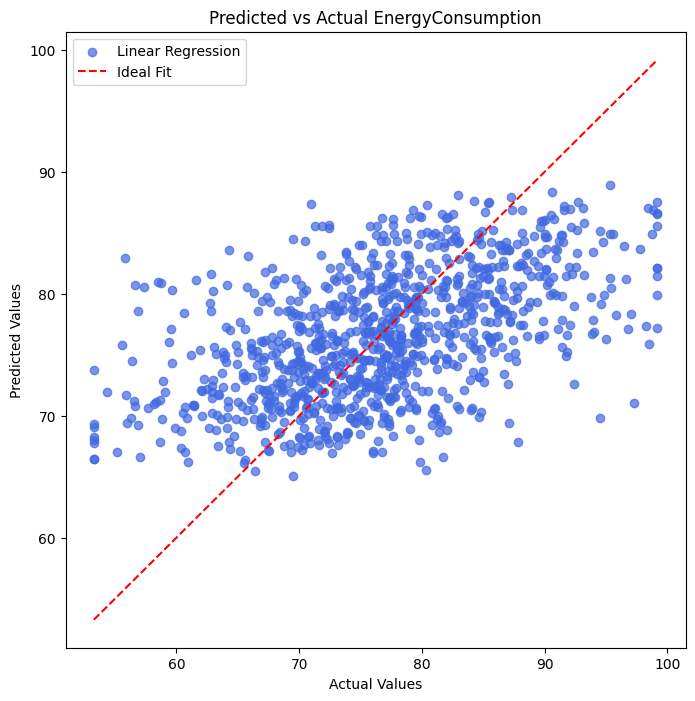

In [51]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, label="Linear Regression", alpha=0.7, color = 'royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit')
plt.title("Predicted vs Actual EnergyConsumption")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()


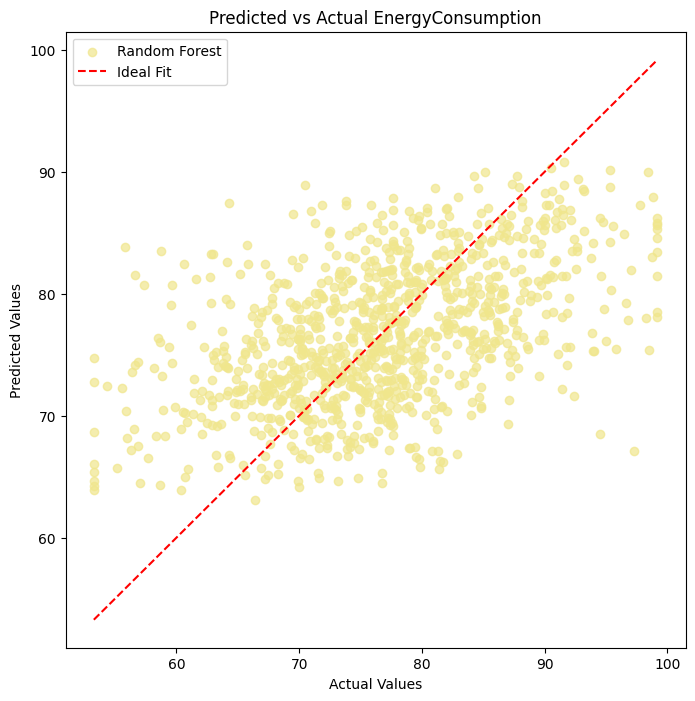

In [52]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, new_y_pred, label="Random Forest", alpha=0.7, color = 'khaki')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit')
plt.title("Predicted vs Actual EnergyConsumption")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()